# Importation des données

In [ ]:
!git clone https://github.com/axelcarlier/animals.git

In [4]:
from utils.affichage import *
import PIL
from PIL import Image
import numpy as np
import os
import re
import cv2

In [6]:
# Chemin vers la base de données
path = "./animals/unlabelled/"
# Indice d'ajout de données dans les variables x et y 
i = 0
# Préparation des structures de données pour x et y
x = np.zeros((50000, 64, 64, 3))

# Parcours des fichiers (classés) du répertoire
dirs = os.listdir(path)

# Trier les fichiers par nom alphanumérique
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)
dirs = sorted_alphanumeric(dirs)

for item in dirs:
  # Image : on va remplir la variable x
  # Lecture de l'image
  img = Image.open(path + item)
  # Remplissage de la variable x
  x[i] = np.asarray(img)
  i = i+1

x = x.astype('uint8')

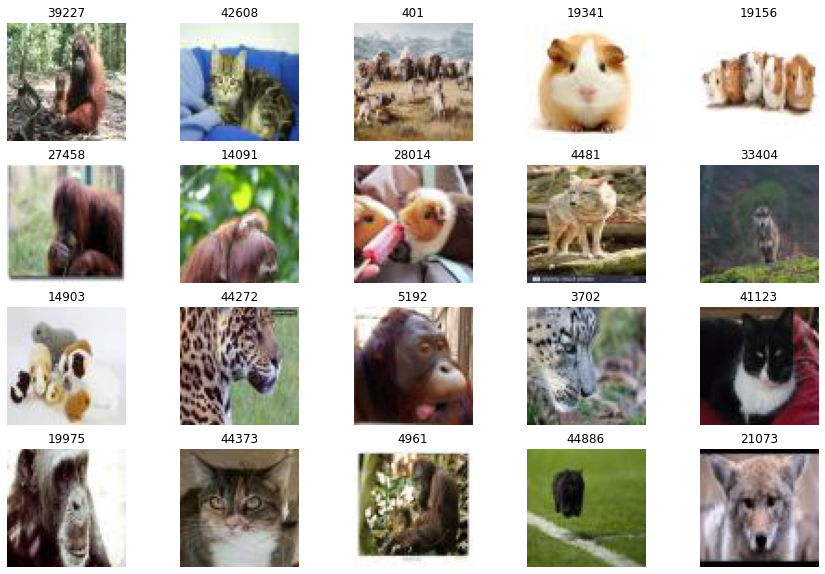

In [3]:
# Visualiser la base de données
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(15, 10))

for i in range(20):
  num = np.random.randint(x.shape[0])
  plt.subplot(4, 5, i+1)
  plt.imshow(x[num]);
  plt.title(str(num+1))
  plt.axis('off')
plt.show()


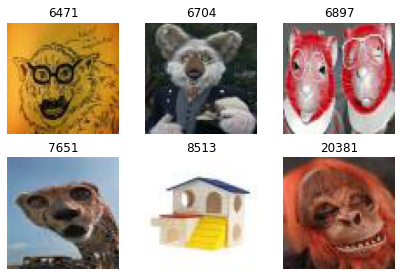

In [4]:
afficher_txt("imagestolabel/bizarre.txt",x)

In [11]:
i = 6001

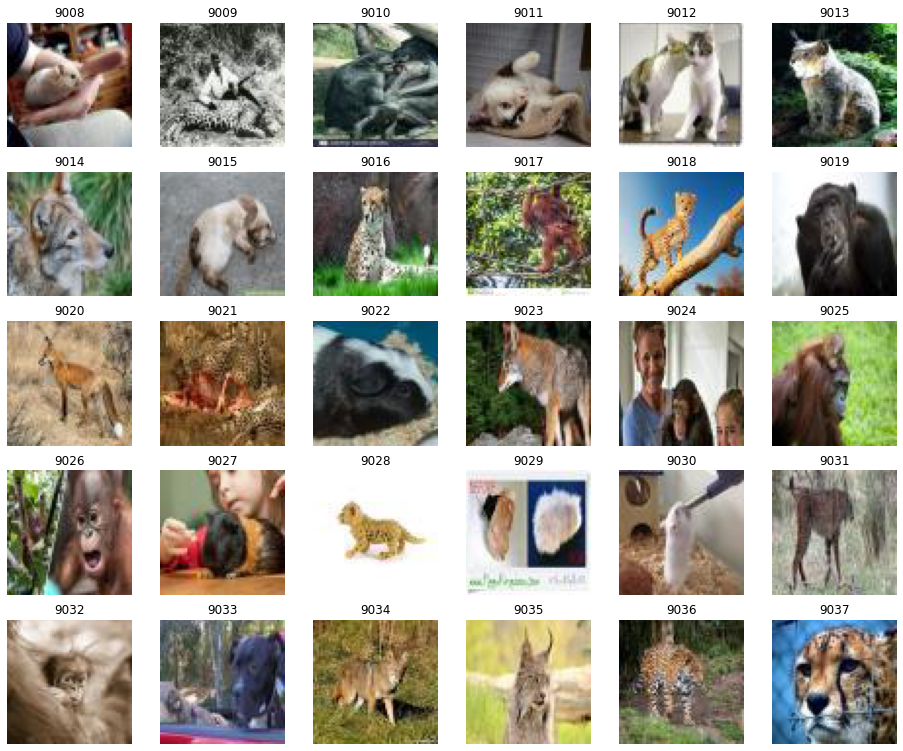

In [111]:
afficher_liste(list(range(i,i+30)))
i += 31

In [60]:
import cv2
import copy
# 0.  background
# 1.  hamster
# 2.  cochon d'inde
# 3.  loup
# 4.  coyote
# 5.  chat
# 6.  lynx
# 7.  guépard
# 8.  jaguar
# 9.  orang-outan
# 10. chimpanzé
def process_mask(path,class_num):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_bin = copy.deepcopy(img)
    ind = np.where(img >0)
    img_bin[ind] = 1
    img_bin = img_bin * class_num
    return img_bin

In [1]:
os.getcwd()

'c:\\Users\\thips\\Documents\\N7\\3A\\Deep Learning\\segmentation-deep-learning-project'

In [62]:
from utils.deplacer import *

In [63]:
txt_to_folder()

In [61]:
animals = ["chimpanze","coyote","guepard","jaguar","loup","orang_outan"]
classes = [10,4,7,8,3,9]

for (i,animal) in enumerate(animals) :
    folder_name = "masques/"+animal+"_mask"
    for fichier in os.listdir(folder_name) :
        path = folder_name+"/"+fichier
        mask = process_mask(path,classes[i])
        name = fichier.split('.')[0]
        cv2.imwrite("masques_labels/"+animal+"_mask/"+name+"_mask.png",mask)

In [31]:
np.sum(mask==10)

1388

In [29]:
b = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
print(b.shape)
np.sum(b==0)

(64, 64)


2708

In [52]:
a = cv2.imread("masques_labels/"+animal+"_mask/"+name+"_mask.jpg",cv2.IMREAD_GRAYSCALE)
a.shape

np.max(a)

15

In [ ]:
def process_folder(path,class_num):
  mask = []
  for fichier in os.listdir(path):
    mask.append(process_mask(path+"/"+fichier, class_num))
  return mask 

In [ ]:
def process_mask(path,class_num):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_bin = copy.deepcopy(img)
    ind = np.where(img >0)
    img_bin[ind] = 1
    img_bin = img_bin * class_num
    return img_bin

In [21]:
def mask_to_tensor(mask_path,class_num):
    """
    Prend en entrée un masque (n,m) et renvoie un tenseur (n,m,11) accepté par le réseau
    """
    img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    tensor = np.zeros((img.shape[0],img.shape[1],11))
    tensor[:,:,class_num] = np.where(img>0,1,0)
    return tensor

In [88]:
animals = ["chimpanze","coyote","guepard","jaguar","loup","orang_outan"]
classes = [10,4,7,8,3,9]

x = np.empty((0,64,64,3))
y = np.empty((0,64,64,11))

for (i,animal) in enumerate(animals) :
    folder_name_mask = "masques/"+animal+"_mask"
    folder_name_img = "animals/fromclass/"+animal
    for fichier in os.listdir(folder_name_mask) :
        # Process mask
        path_mask = folder_name_mask+"/"+fichier
        mask = mask_to_tensor(path_mask,classes[i])
        mask_extend = np.expand_dims(mask,0)
        y = np.append(y,mask_extend,0)
        # Process image
        img_name = fichier.split(".")[0]+".jpg"
        path_img = folder_name_img+"/"+img_name
        img = cv2.imread(path_img)
        img_extend = np.expand_dims(img,0)
        x = np.append(x,img_extend,0)
    

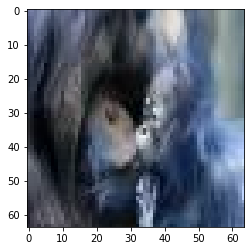

In [89]:
plt.imshow(img)

In [90]:
y.shape

(311, 64, 64, 11)

In [91]:
x.shape

(311, 64, 64, 3)

In [1]:
from utils.dataloader import *

x,y = load_data()

c:\Users\thips\Documents\N7\3A\Deep Learning\segmentation-deep-learning-project
(64, 64, 3)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)